In [2]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
#Import LR 
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
#scaling the data,removing nan values and removing description based data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#Few null value in ->  4   total_bedrooms      20433 non-null  float64
data.dropna(inplace=True) #drops nan value row
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
#train test split -> train->80%  test->20%
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
18752,-122.42,40.63,23.0,2248.0,489.0,1132.0,444.0,1.6429,INLAND
7693,-118.12,33.97,33.0,3099.0,839.0,2025.0,750.0,3.1830,<1H OCEAN
5085,-118.28,33.98,39.0,1306.0,345.0,1332.0,331.0,1.9564,<1H OCEAN
13719,-117.18,34.07,14.0,1258.0,245.0,752.0,264.0,3.3924,INLAND
17570,-121.94,37.32,46.0,2451.0,472.0,1163.0,448.0,4.8519,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6379,-118.05,34.17,45.0,2535.0,455.0,1036.0,437.0,5.0482,INLAND
12953,-121.28,38.70,15.0,5828.0,1051.0,2868.0,1037.0,3.7813,INLAND
16306,-121.36,38.01,16.0,926.0,230.0,451.0,198.0,4.0221,INLAND
836,-122.04,37.60,17.0,3314.0,638.0,1873.0,602.0,4.3875,NEAR BAY


In [10]:
train_data=x_train.drop(['ocean_proximity'],axis=1,inplace=True)
train_data

In [11]:
train_data=x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
18752,-122.42,40.63,23.0,2248.0,489.0,1132.0,444.0,1.6429,80400.0
7693,-118.12,33.97,33.0,3099.0,839.0,2025.0,750.0,3.1830,191100.0
5085,-118.28,33.98,39.0,1306.0,345.0,1332.0,331.0,1.9564,92200.0
13719,-117.18,34.07,14.0,1258.0,245.0,752.0,264.0,3.3924,97400.0
17570,-121.94,37.32,46.0,2451.0,472.0,1163.0,448.0,4.8519,225800.0
...,...,...,...,...,...,...,...,...,...
6379,-118.05,34.17,45.0,2535.0,455.0,1036.0,437.0,5.0482,388900.0
12953,-121.28,38.70,15.0,5828.0,1051.0,2868.0,1037.0,3.7813,143200.0
16306,-121.36,38.01,16.0,926.0,230.0,451.0,198.0,4.0221,173300.0
836,-122.04,37.60,17.0,3314.0,638.0,1873.0,602.0,4.3875,238500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

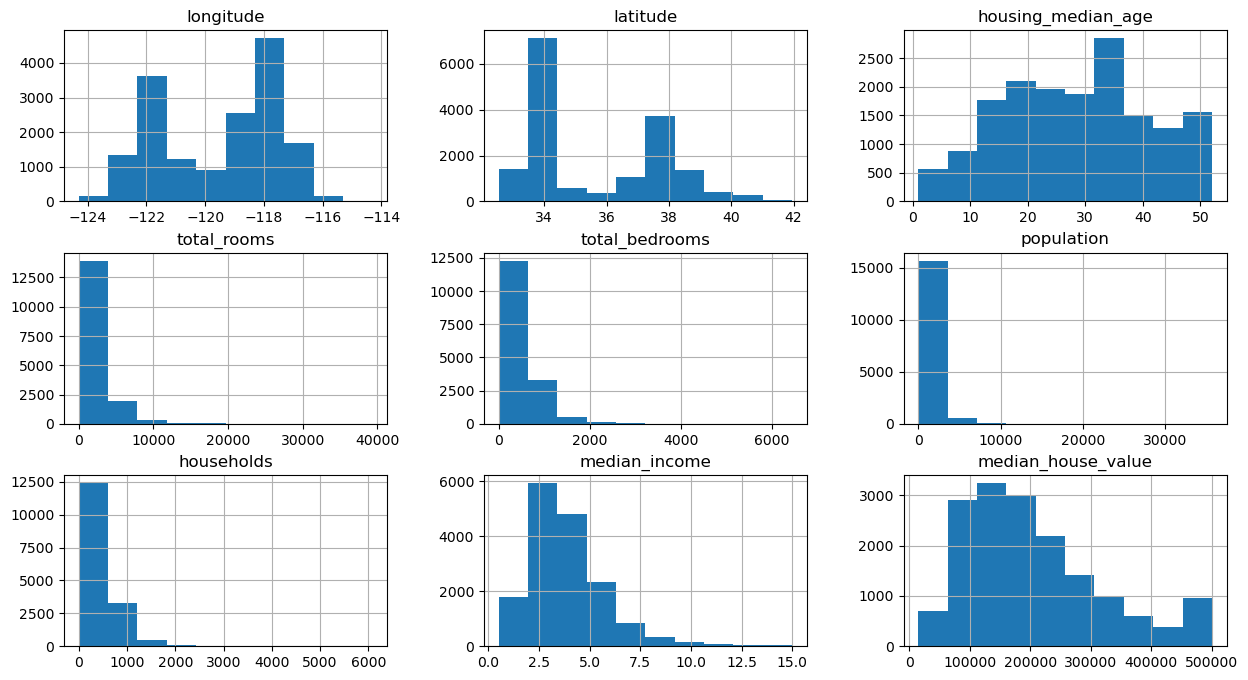

In [12]:
train_data.hist(figsize=(15,8))

<Axes: >

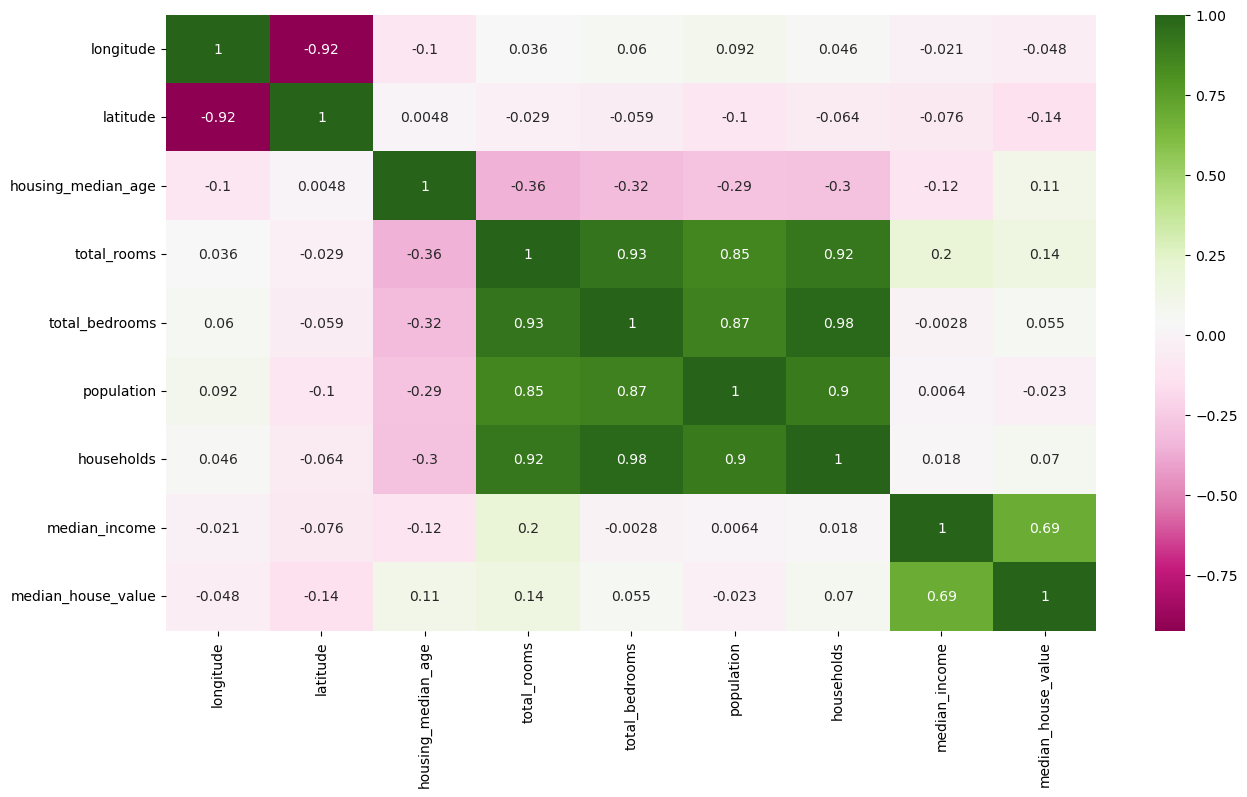

In [13]:
#correlation
#train_data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="PiYG")

In [14]:
#right or left skwed dataset
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

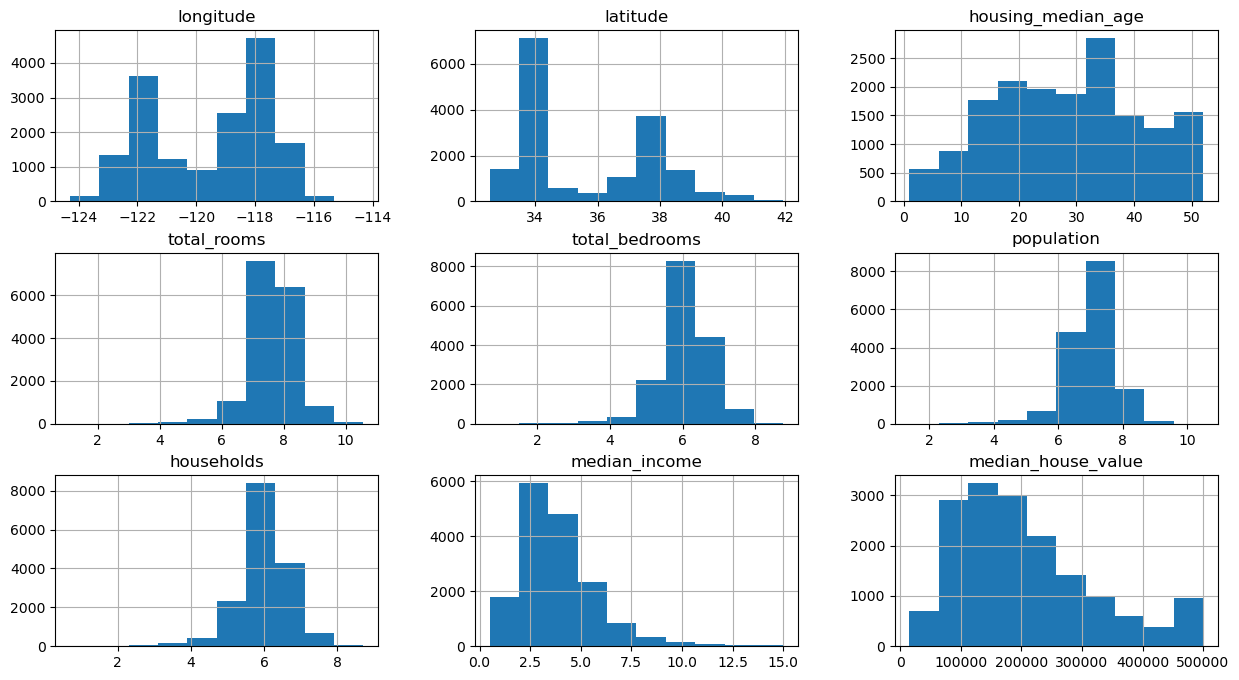

In [15]:
train_data.hist(figsize=(15,8))

In [16]:
#train_data.drop([9],axis=1,inplace=True)
train_data.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'], dtype=object)

In [17]:
#adding ocean_proximity column to train_data and considering it as factor to determine housing price
if 'ocean_proximity' not in train_data.columns.values:
    train_data['ocean_proximity']=data['ocean_proximity']
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7251
INLAND        5210
NEAR OCEAN    2075
NEAR BAY      1806
ISLAND           4
Name: count, dtype: int64

In [18]:
#hard encoding-pd.get_dummies(train_data.ocean_proximity)
#making column for each label as t/f
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop('ocean_proximity',axis=1)

In [19]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18752,-122.42,40.63,23.0,7.718241,6.194405,7.032624,6.098074,1.6429,80400.0,False,True,False,False,False
7693,-118.12,33.97,33.0,8.039157,6.733402,7.613819,6.621406,3.1830,191100.0,True,False,False,False,False
5085,-118.28,33.98,39.0,7.175490,5.846439,7.195187,5.805135,1.9564,92200.0,True,False,False,False,False
13719,-117.18,34.07,14.0,7.138073,5.505332,6.624065,5.579730,3.3924,97400.0,False,True,False,False,False
17570,-121.94,37.32,46.0,7.804659,6.159095,7.059618,6.107023,4.8519,225800.0,True,False,False,False,False


<Axes: >

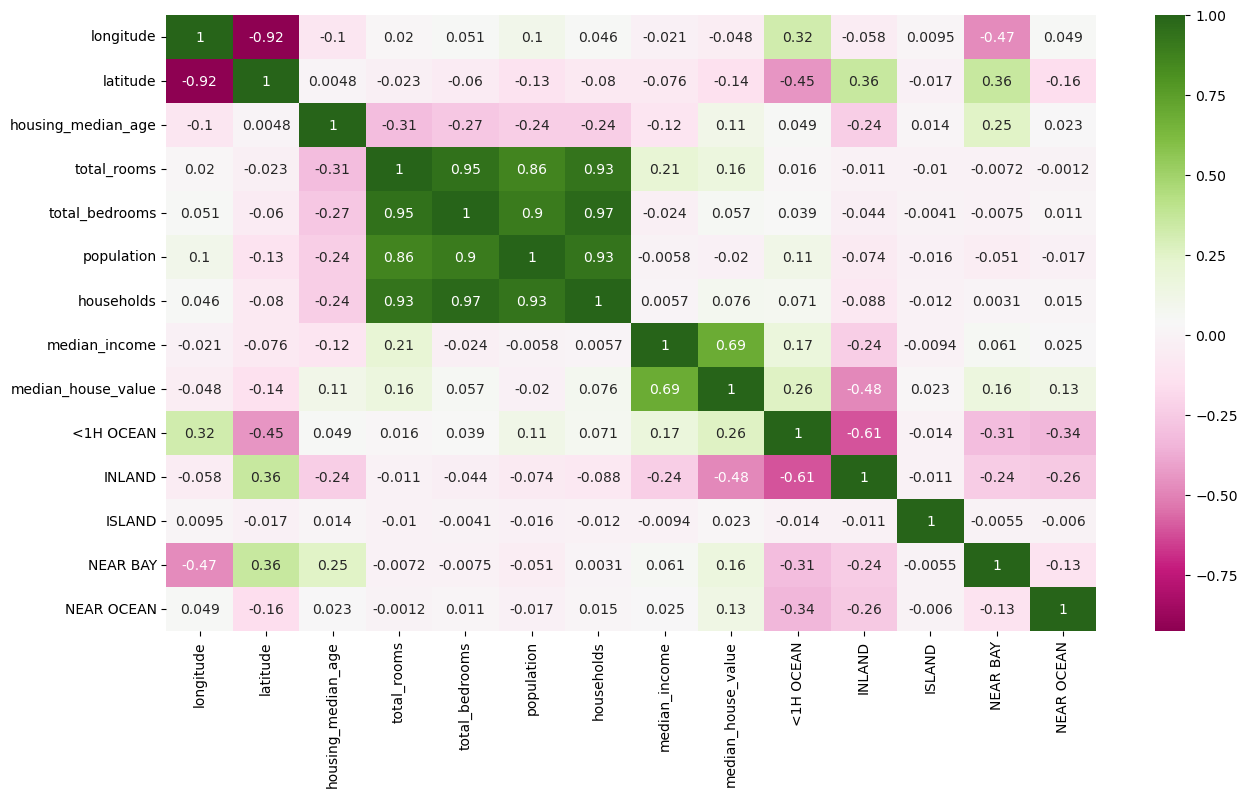

In [20]:
#correlation
#train_data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="PiYG")

<Axes: xlabel='latitude', ylabel='longitude'>

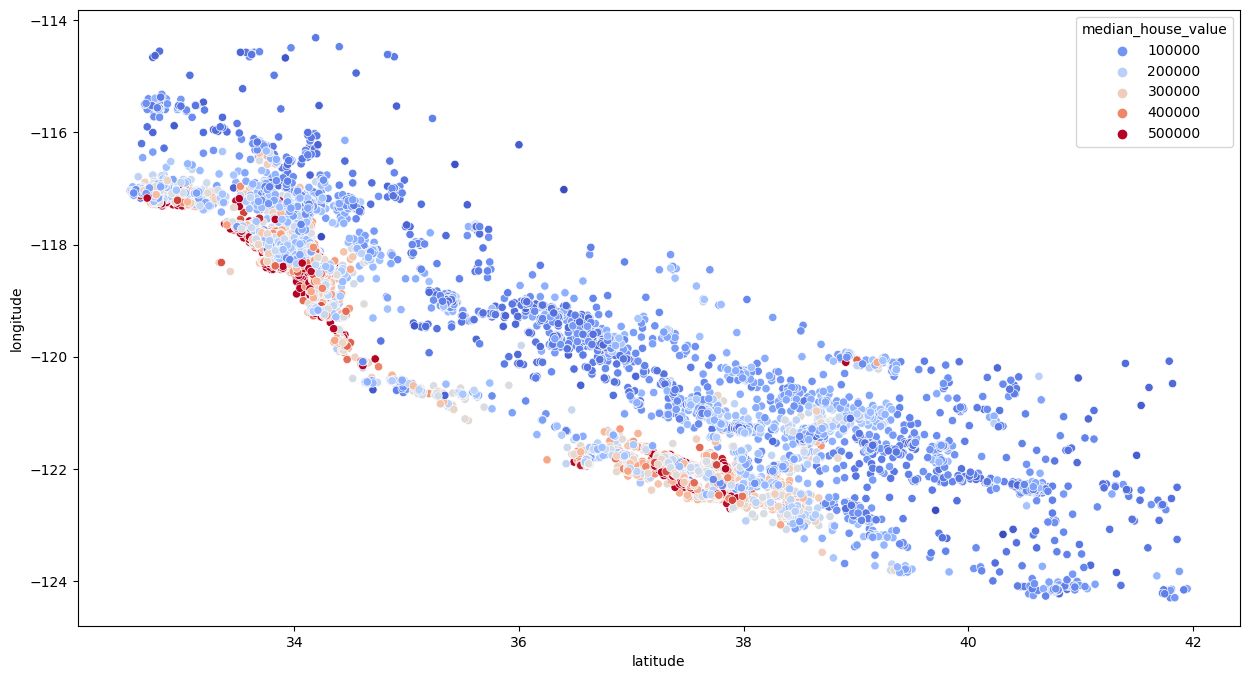

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value", palette="coolwarm")

In [22]:
#two other feature no. of bedrooms and nearing household rooms
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

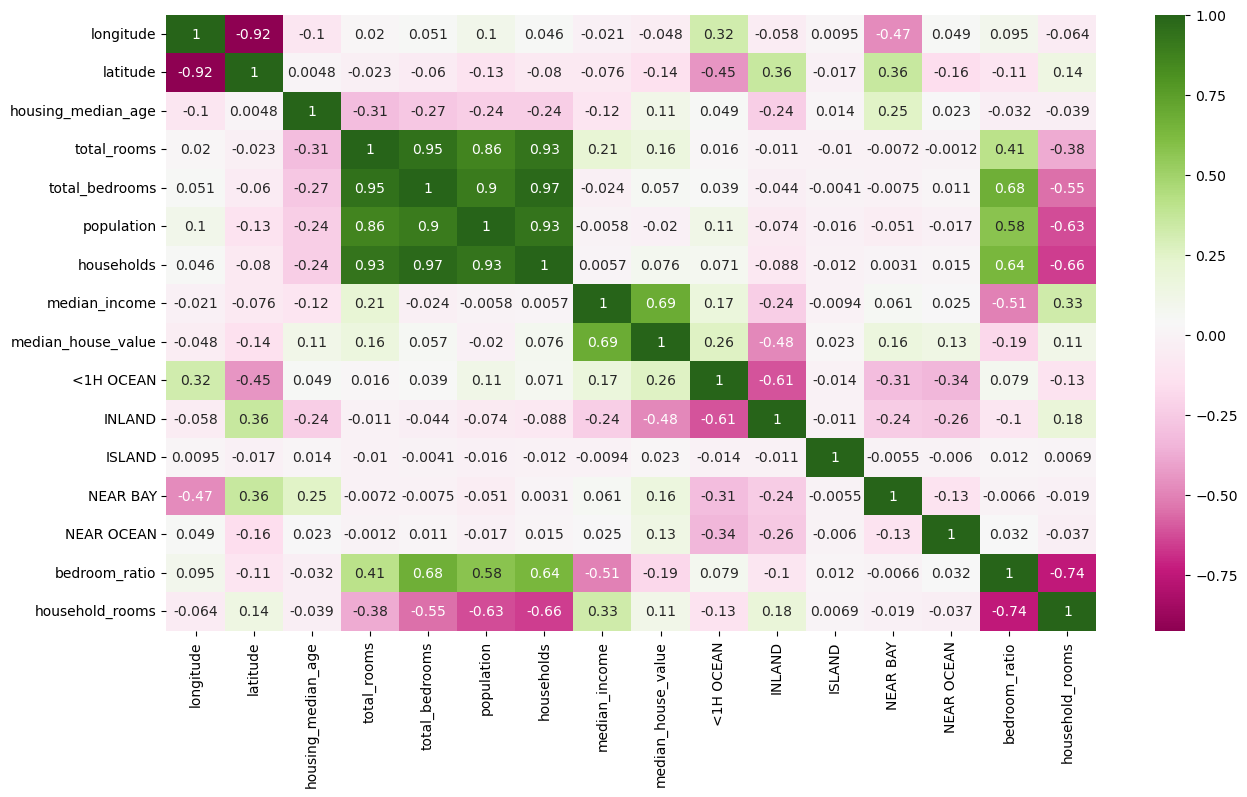

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="PiYG")

In [24]:
#Split test data with new features
from sklearn.linear_model import LinearRegression
x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [25]:
#evaluation 
test_data=x_train.join(y_test)
#right or left skwed dataset
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

#two other feature no. of bedrooms and nearing household rooms
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [26]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']
x_test.shape

(16346, 15)

In [27]:
res=reg.score(x_train,y_train)
print("The Accuracy acquired with selected feature:",res*100)

The Accuracy acquired with selected feature: 67.08575797371901
